# Basic modeling

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.linear_model import LinearRegression

In [2]:
# Read data
d = pd.read_csv('rh_data.csv')
d.head(5)

,id,work,gender,age,treatment,before,after
0,1,Stables,Male,16,garlic,113,58
1,2,Barracks,Male,28,garlic,137,83
2,3,Kitchen,Female,30,garlic,73,39
3,4,Stables,Male,27,garlic,156,90
4,5,Barracks,Male,10,garlic,70,22


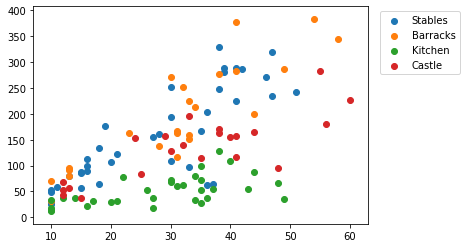

In [5]:
ax = plt.axes()
for w in d.work.unique():
    ax = plt.scatter(d[d.work==w].age, d[d.work==w].before, label=w)
plt.legend(bbox_to_anchor=(1.02,1), loc='upper left'); # First set a box, then position the legend within this box

Go through this now: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f